In [1]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt
import numpy as np

### Loading data from cifar10
______________

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [4]:
x_train.shape, y_train.shape, x_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3))

In [138]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [24]:
y_train[:5]    # This is a 2 dimentional array. we ned only one dimenstional. 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [116]:
y_train = y_train.reshape(-1,)  # -1 to keep the first dimension as it is. and after comma
                                #  we want make it to 
y_test = y_test.reshape(-1,)

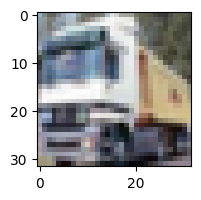

In [23]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

In [84]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [98]:
def plot_sample(x,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[int(y[index])])
    

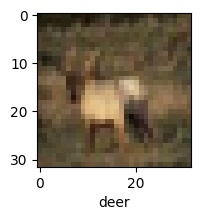

In [101]:
plot_sample(x_train,y_train, 3 )

### ANN for image classification
-------------------

In [109]:
ANN = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(300, activation = 'relu'),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(10, activation = 'relu'),
])

ANN.compile( optimizer = "adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"]
)

ANN.fit(x_train[:500], y_train[:500], epochs = 5) 

Epoch 1/5
16/16 [==============================] - 1s 20ms/step - loss: 13.3879 - accuracy: 0.1220
Epoch 2/5
16/16 [==============================] - 0s 17ms/step - loss: 14.0233 - accuracy: 0.1300
Epoch 3/5
16/16 [==============================] - 0s 17ms/step - loss: 14.0227 - accuracy: 0.1300
Epoch 4/5
16/16 [==============================] - 0s 18ms/step - loss: 14.0227 - accuracy: 0.1300
Epoch 5/5
16/16 [==============================] - 0s 17ms/step - loss: 14.0227 - accuracy: 0.1300


In [110]:
ANN.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 14.5063 - accuracy: 0.1000


[14.506270408630371, 0.10000000149011612]

### CNN for image classification
____________________________________________

In [112]:
CNN = models.Sequential([
    
    layers.Conv2D(filters = 32, activation = 'relu', kernel_size = (3,3), input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters = 64, activation = 'relu', kernel_size = (3,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'), # this normalises the values
])

In [113]:
CNN.compile( optimizer = "adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"]
           )


In [114]:
CNN.fit(x_train[:10000],y_train[:10000], epochs= 5)

Epoch 1/5
313/313 [==============================] - 7s 20ms/step - loss: 1.8735 - accuracy: 0.3117
Epoch 2/5
313/313 [==============================] - 6s 18ms/step - loss: 1.4850 - accuracy: 0.4598
Epoch 3/5
313/313 [==============================] - 6s 19ms/step - loss: 1.3346 - accuracy: 0.5202
Epoch 4/5
313/313 [==============================] - 6s 18ms/step - loss: 1.2341 - accuracy: 0.5599
Epoch 5/5
313/313 [==============================] - 6s 19ms/step - loss: 1.1258 - accuracy: 0.6026


In [115]:
CNN.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.2716 - accuracy: 0.5499


[1.271606683731079, 0.5498999953269958]

In [122]:
y_pred = CNN.predict(x_test)


313/313 [==============================] - 2s 5ms/step


3

In [127]:
classes[np.argmax(y_pred[0])], classes[y_test[0]]

('cat', 'cat')

In [133]:
y_prediction = [np.argmax(element) for element in y_pred]
y_prediction[:5]

[3, 1, 8, 8, 6]

In [135]:
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.61      0.52      0.56      1000
           1       0.59      0.78      0.67      1000
           2       0.50      0.31      0.38      1000
           3       0.40      0.38      0.39      1000
           4       0.54      0.36      0.43      1000
           5       0.57      0.35      0.44      1000
           6       0.50      0.81      0.62      1000
           7       0.67      0.63      0.65      1000
           8       0.54      0.81      0.65      1000
           9       0.59      0.55      0.57      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.54     10000
weighted avg       0.55      0.55      0.54     10000

